# Analysis of the Titanic data set (data wrangling task)
Notebook used for reading in and working with the Titanic passenger data set.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

### Reading the training data
Read in the training data and inspect:

In [2]:
df = pd.read_csv("data_titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data wrangling of the training data
Find `NaN` values and deal with them to get a dense data frame:

In [3]:
print("Number of missing values per column before imputation:")
print(df[df.isna().any(axis=1)].isna().sum()) # find rows with NaN values

df_nc = df.drop("Cabin", axis=1) # drop "Cabin" as most values are NaN
df_nc["Age"] = df_nc["Age"].fillna(df_nc["Age"].mean()) # fill missing "Age" values with mean

print("\nNumber of missing values per column after removal of Cabin and filling average age:")
print(df_nc[df_nc.isna().any(axis=1)].isna().sum()) # remaining rows with NaN values

Number of missing values per column before imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of missing values per column after removal of Cabin and filling average age:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


Remove remaining two rows with `NaN` values:

In [4]:
to_remove_index = df_nc[df_nc.isna().any(axis=1)].index # find indeces of last rows with NaN values
df_train = df_nc.drop(to_remove_index, axis=0) # remove them, as they are only two

print("Occurence of NaN values after treatment of the data:")
print(df_train.isna().any()) # check if no columns with missing values are left

Occurence of NaN values after treatment of the data:
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool


### Analysis of the training data
Calculate medians and means of the final training data set:

In [5]:
print("MEDIANS of final training data set:")
print(df_train.quantile(numeric_only=True))

print("\nMEANS of final training data set:")
print(df_train.mean(numeric_only=True))

MEDIANS of final training data set:
PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.454200
Name: 0.5, dtype: float64

MEANS of final training data set:
PassengerId    446.000000
Survived         0.382452
Pclass           2.311586
Age             29.653446
SibSp            0.524184
Parch            0.382452
Fare            32.096681
dtype: float64


Plot a histogram of the fare (ticket price):

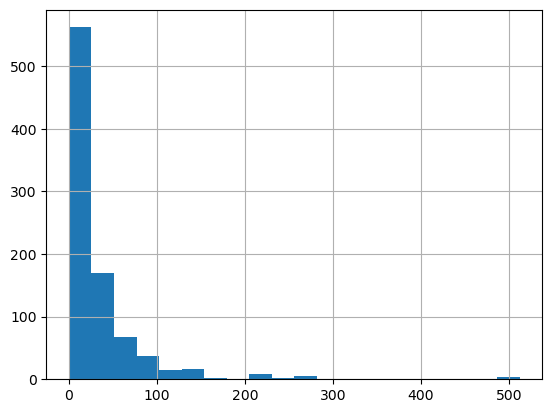

In [6]:
plt.figure()
plt.hist(df_train["Fare"].values, bins=20)
plt.grid()
plt.show()

Plot the age against the fare (not very informative):

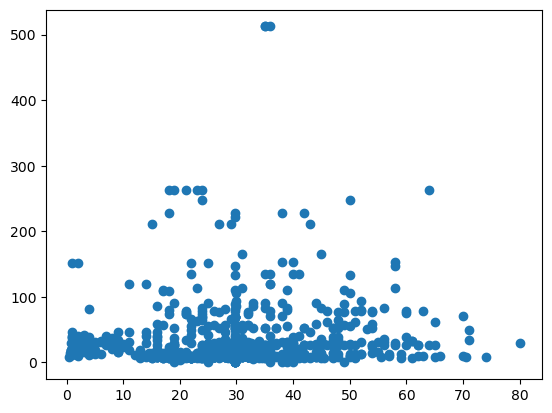

In [7]:
plt.figure()
plt.scatter(df_train["Age"].values, df_train["Fare"].values)
plt.show()

### Transformation and PCA
One-hot encode categorial variables and remove features that can't be encoded:

In [8]:
df_one_hot = pd.get_dummies(df_train, columns=["Sex", "Embarked"], drop_first=True)
df_drop = df_one_hot.drop(["Name", "Ticket"], axis=1)
df_drop

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0


Run PCA and transform:

In [9]:
pca = PCA(n_components=2)
pca.fit(df_drop)
X_transformed = pca.transform(df_drop)

Plot first two PCs:

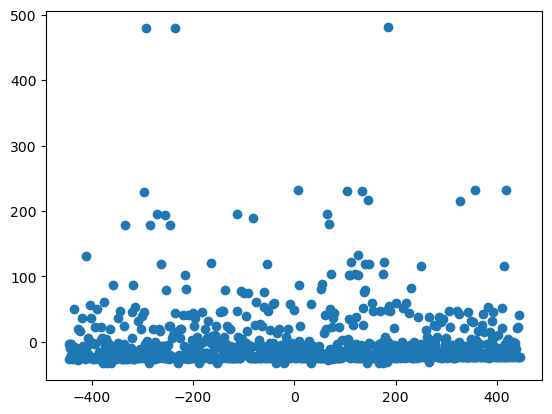

In [10]:
plt.figure()
plt.scatter(X_transformed[:,0],X_transformed[:,1])
plt.show()

### Logistic regression
Find a logistic model to predict survival in the test data:

In [11]:
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(df_drop.drop(["Survived"], axis=1), df_train["Survived"].values)

LogisticRegression(max_iter=1000, random_state=0)

### Read and manipulate test data
Same procedure that was used for the training data:

In [12]:
df = pd.read_csv("data_titanic/test.csv")

print("Number of missing values per column before imputation:")
print(df[df.isna().any(axis=1)].isna().sum()) # find rows with NaN values

df_nc = df.drop("Cabin", axis=1) # drop "Cabin" as most values are NaN
df_nc["Age"] = df_nc["Age"].fillna(df_nc["Age"].mean()) # fill missing "Age" values with mean

print("\nNumber of missing values per column after removal of Cabin and filling average age:")
print(df_nc[df_nc.isna().any(axis=1)].isna().sum()) # remaining rows with NaN values

Number of missing values per column before imputation:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Number of missing values per column after removal of Cabin and filling average age:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [13]:
to_remove_index = df_nc[df_nc.isna().any(axis=1)].index # find index of last row with NaN values
df_test = df_nc.drop(to_remove_index, axis=0).reset_index() # remove it, as it is only one
# reset_index so there is no problem with the missing index of the dropped line

print("Occurence of NaN values after treatment of the data:")
print(df_test.isna().any()) # check if no columns with missing values are left

Occurence of NaN values after treatment of the data:
index          False
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool


In [14]:
df_one_hot = pd.get_dummies(df_test, columns=["Sex", "Embarked"], drop_first=True)
df_dt = df_one_hot.drop(["index", "Name", "Ticket"], axis=1) # also drop index to match training
df_dt

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,1,1,0
1,893,3,47.00000,1,0,7.0000,0,0,1
2,894,2,62.00000,0,0,9.6875,1,1,0
3,895,3,27.00000,0,0,8.6625,1,0,1
4,896,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
412,1305,3,30.27259,0,0,8.0500,1,0,1
413,1306,1,39.00000,0,0,108.9000,0,0,0
414,1307,3,38.50000,0,0,7.2500,1,0,1
415,1308,3,30.27259,0,0,8.0500,1,0,1


### Predict survival using logistic model

In [15]:
prediction = clf.predict(df_dt)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Make an array for predictions:

In [16]:
array_df = pd.DataFrame({"Prediction": prediction})
df_pred = pd.concat([df_dt["PassengerId"], array_df], axis=1)
df_pred

,PassengerId,Prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


Read CSV with solutions and merge them:

In [17]:
csv = pd.read_csv("data_titanic/gender_submission.csv")

df_merge = pd.merge(df_pred, csv, on="PassengerId", how="inner")
df_merge

,PassengerId,Prediction,Survived
0,892,0,0
1,893,0,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
412,1305,0,0
413,1306,1,1
414,1307,0,0
415,1308,0,0


Find number and relative amount of correct predictions:

In [18]:
matching = (df_merge['Prediction'] == df_merge['Survived']).sum()
print(f"Number of correct predictions: {matching}")
print(f"Relative amount of correct predictions: {matching/len(df_merge['Survived']):.4f}")

Number of correct predictions: 396
Relative amount of correct predictions: 0.9496
